# RNN Prediction Students JAMB Scores

## Import Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("idowuadamo/students-performance-in-2024-jamb")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/idowuadamo/students-performance-in-2024-jamb/versions/1


## Import libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
import pandas as pd
import numpy as np
import keras
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

2024-10-24 01:24:55.738829: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-24 01:24:55.751873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 01:24:55.767698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 01:24:55.772375: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 01:24:55.785848: I tensorflow/core/platform/cpu_feature_guar

## Load Dataset

In [3]:
df = pd.read_csv(path + "/jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


## Finding Nulls in Dataset

In [4]:
null_counts = df.isnull().sum()
print(null_counts)

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64


## Filling missing values

In [5]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].bfill()

## Train Test Val Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('JAMB_Score', axis=1), df['JAMB_Score'], test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## MinMax Scale JAMB_Score

In [7]:
minmax = MinMaxScaler()

y_train = minmax.fit_transform(y_train.values.reshape(-1, 1))
y_test = minmax.transform(y_test.values.reshape(-1, 1))
y_val = minmax.transform(y_val.values.reshape(-1, 1))

## Standard Scale Integer Data

In [8]:
scaler = StandardScaler()

X_train_1 = scaler.fit_transform(X_train[['Study_Hours_Per_Week', 'Attendance_Rate', 'Teacher_Quality', 'Distance_To_School', 'Age', 'Assignments_Completed']]) 
X_test_1 = scaler.transform(X_test[['Study_Hours_Per_Week', 'Attendance_Rate', 'Teacher_Quality', 'Distance_To_School', 'Age', 'Assignments_Completed']])
X_val_1 = scaler.transform(X_val[['Study_Hours_Per_Week', 'Attendance_Rate', 'Teacher_Quality', 'Distance_To_School', 'Age', 'Assignments_Completed']])

## Label Encode String Data

In [9]:
label_encoder = LabelEncoder()
columns_to_encode = ['School_Type', 'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials', 'Parent_Involvement', 'IT_Knowledge', 'Gender', 'Socioeconomic_Status', 'Parent_Education_Level']

for column in columns_to_encode:
    X_train[f'{column}_encode'] = label_encoder.fit_transform(X_train[column])
    X_test[f'{column}_encode'] = label_encoder.transform(X_test[column])
    X_val[f'{column}_encode'] = label_encoder.transform(X_val[column])

In [10]:
X_train_2 = X_train[['School_Type_encode', 'School_Location_encode', 'Extra_Tutorials_encode', 'Access_To_Learning_Materials_encode', 'Parent_Involvement_encode', 'IT_Knowledge_encode', 'Gender_encode', 'Socioeconomic_Status_encode', 'Parent_Education_Level_encode']].to_numpy()
X_test_2 = X_test[['School_Type_encode', 'School_Location_encode', 'Extra_Tutorials_encode', 'Access_To_Learning_Materials_encode', 'Parent_Involvement_encode', 'IT_Knowledge_encode', 'Gender_encode', 'Socioeconomic_Status_encode', 'Parent_Education_Level_encode']].to_numpy()
X_val_2 = X_val[['School_Type_encode', 'School_Location_encode', 'Extra_Tutorials_encode', 'Access_To_Learning_Materials_encode', 'Parent_Involvement_encode', 'IT_Knowledge_encode', 'Gender_encode', 'Socioeconomic_Status_encode', 'Parent_Education_Level_encode']].to_numpy()

## Join Standarized and Encoded variables

In [11]:
X_train = [X_train_1, X_train_2]
X_test = [X_test_1, X_test_2]
X_val = [X_val_1, X_val_2]

## Make Model

In [12]:
# Adding model checkpoint callback
checkpoint = keras.callbacks.ModelCheckpoint('best_model.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, mode='min')

# Adding learning rate scheduler callback
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)


# Adding more layers and regularization
model = keras.models.Sequential([
    keras.layers.Input(shape=(X_train[0].shape[1],)),
    keras.layers.Reshape((X_train[0].shape[1], 1)),
    keras.layers.LSTM(512, activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.LSTM(256, activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.LSTM(128, activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.LSTM(64, activation='relu', dropout=0.2, recurrent_dropout=0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Using a different optimizer and adding learning rate scheduler
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


model.summary()


model_history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val), callbacks=[checkpoint, lr_scheduler])

I0000 00:00:1729743900.580037   85619 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729743900.580416   85619 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729743900.580659   85619 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729743901.342883   85619 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729743901.343355   85619 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 6, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 6, 512)         │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 6, 256)         │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 6, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,088,769 (7.97 MB)

 Trainable params: 2,088,769 (7.97 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


I0000 00:00:1729743906.446332   85716 service.cc:146] XLA service 0x7f8d2c007550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729743906.446392   85716 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-10-24 01:25:06.615302: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-24 01:25:07.437131: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8900
2024-10-24 01:25:14.221416: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_135', 8 bytes spill stores, 8 bytes spill loads

2024-10-24 01:25:14.306783: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memor

 1/32 ━━━━━━━━━━━━━━━━━━━━ 12:52 25s/step - loss: 0.1279

I0000 00:00:1729743927.225057   85716 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0750

2024-10-24 01:25:30.668438: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_133', 32 bytes spill stores, 32 bytes spill loads

2024-10-24 01:25:32.496767: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_135', 76 bytes spill stores, 76 bytes spill loads

2024-10-24 01:25:34.646246: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_135', 8 bytes spill stores, 8 bytes spill loads

2024-10-24 01:25:35.571151: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_140', 32 bytes spill stores, 32 bytes spill loads



32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 748ms/step - loss: 0.0716 - val_loss: 0.0266 - learning_rate: 0.0010
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0259 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0254 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0258 - val_loss: 0.0256 - learning_rate: 0.0010
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0262 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0250 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0249 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0252 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0248 - val_loss: 0.0256 - learning_rate: 0.0010
Epoch 10/30
32/32 ━━━━━━━━━━

## Loading best weights to the model

In [13]:
model.load_weights('best_model.weights.h5')

## Ploting Model Loss

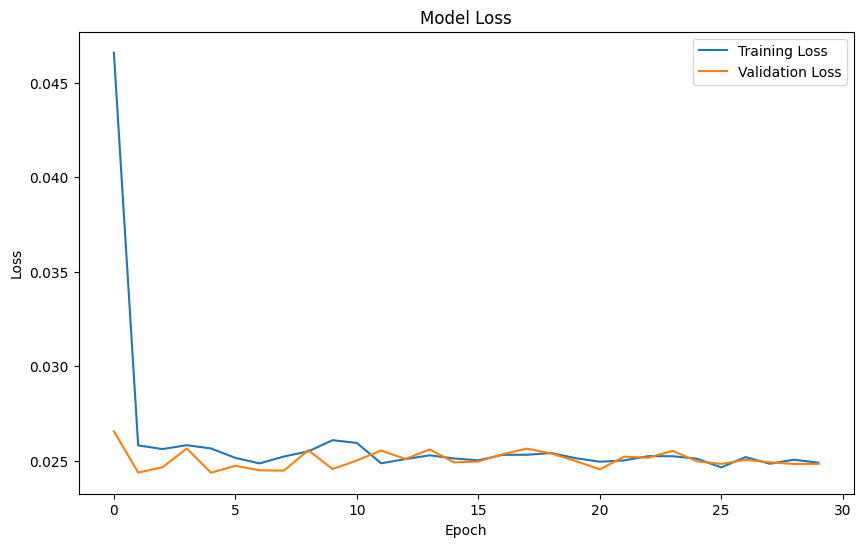

In [14]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Evaluating Model

In [15]:
loss = model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0219


## Making Predictions

In [16]:
predictions = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


## Rescaling variables

In [17]:
predictions_rescaled = minmax.inverse_transform(predictions)
y_test_rescaled = minmax.inverse_transform(y_test)


## Plotting

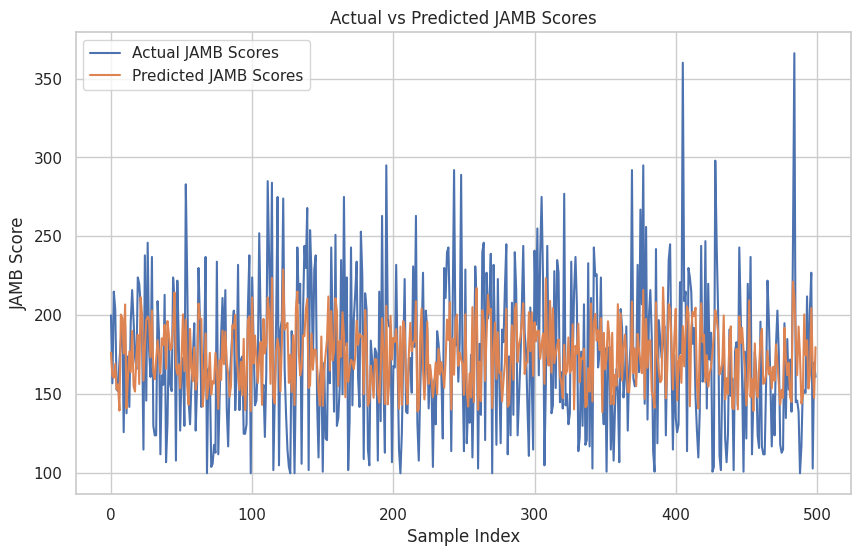

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=y_test_rescaled.flatten(), label='Actual JAMB Scores')
sns.lineplot(data=predictions_rescaled.flatten(), label='Predicted JAMB Scores')
plt.xlabel('Sample Index')
plt.ylabel('JAMB Score')
plt.title('Actual vs Predicted JAMB Scores')
plt.legend()
plt.show()

## Conclusion

This notebook demonstrates the process of predicting students' JAMB scores using an RNN model. We started by importing and preprocessing the dataset, handling missing values, and scaling the data. We then built and trained an LSTM model, evaluated its performance, and visualized the results. The model's predictions closely matched the actual scores, indicating its potential effectiveness in educational performance prediction.